In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [2]:
df_subset = pd.read_csv('./dataset_/subset_dataset_with_emotion_norms.csv') 

In [3]:
df_shuffled = df_subset.sample(frac=1)
df_shuffled.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,sub_genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,time_signature,genre,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,syuzhet_norm,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,Popu_max,Top10_dummy,Top50_dummy,Cluster,duration_min
38695,Costa Rica,https://open.spotify.com/track/39zWYYZStDgWi32...,348.40,fear inoculum,TOOL,album,alternative metal,1693711.0,False,Fear Inoculum,2019-08-30,1,10,0.313,0.5840,7,-10.091,1,0.0415,0.000824,0.520000,0.0529,0.1590,87.894,4,metal,442.0,1.0,1,0,1,0,0,-1.0,4.0,3.0,3.0,4.0,0.0,2.0,0.0,0.0,6.0,0.0,128.0,0.250000,0.187500,0.187500,0.250000,0.000000,0.125000,0.000000,0.000000,1.000000,0.000000,-1.0,Explore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50,0.0,1.0,spanish speaking,10.335017
45521,Singapore,https://open.spotify.com/track/1ggYjU6zdFHgANc...,293.80,afterthought,Joji - BENEE,album,alternative r&b,3586162.0,False,Nectar,2020-09-24,13,18,0.668,0.5470,1,-8.024,1,0.0353,0.398000,0.076600,0.0931,0.1920,83.500,4,r&b/soul,51.0,1.0,1,0,1,0,0,-1.0,1.0,6.0,2.0,5.0,4.0,3.0,0.0,4.0,7.0,6.0,316.0,0.040000,0.240000,0.080000,0.200000,0.160000,0.120000,0.000000,0.160000,0.538462,0.461538,-1.0,Explore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,101,0.0,0.0,english speaking and nordic,3.247850
60032,Ireland,https://open.spotify.com/track/1tpkN6z0Zd3wphA...,16.00,the end of love,Florence + The Machine,album,art pop,5344593.0,False,High As Hope,2018-06-29,9,10,0.254,0.0877,6,-9.996,1,0.0382,0.805000,0.000029,0.1370,0.0907,68.991,4,pop,869.0,1.0,1,0,1,0,0,1.0,2.0,1.0,0.0,2.0,3.0,4.0,1.0,1.0,3.0,4.0,237.0,0.142857,0.071429,0.000000,0.142857,0.214286,0.285714,0.071429,0.071429,0.428571,0.571429,-1.0,Love,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181,0.0,0.0,english speaking and nordic,4.690667
48910,Belgium,https://open.spotify.com/track/6A8dnC0xkiuWN4B...,9615.25,oceans away,A R I Z O N A,album,edm,338687.0,False,GALLERY,2017-05-19,12,12,0.617,0.6420,8,-8.624,1,0.0334,0.130000,0.157000,0.0929,0.2210,105.885,4,dance/electronic,1272.0,1.0,1,0,1,0,0,-1.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,1.0,4.0,1.0,183.0,0.000000,0.142857,0.000000,0.285714,0.000000,0.428571,0.000000,0.142857,0.800000,0.200000,-1.0,Explore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,59,0.0,0.0,english speaking and nordic,3.233550
10689,Global,https://open.spotify.com/track/2dKtWPLZvbCzwLR...,54.40,cant love,Trippie Redd,album,melodic rap,5502398.0,True,A Love Letter To You 3,2018-11-09,5,16,0.842,0.5670,4,-6.504,0,0.0525,0.002440,0.000019,0.1680,0.2560,135.991,4,rap,736.0,1.0,0,1,1,0,0,1.0,5.0,4.0,3.0,4.0,4.0,3.0,1.0,3.0,3.0,6.0,280.0,0.185185,0.148148,0.111111,0.148148,0.148148,0.111111,0.037037,0.111111,0.333333,0.666667,-1.0,Love,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,133,0.0,0.0,global,2.823533


In [4]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69875 entries, 0 to 69874
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              69875 non-null  object 
 1   Uri                  69875 non-null  object 
 2   Popularity           69875 non-null  float64
 3   Title                69875 non-null  object 
 4   Artist               69875 non-null  object 
 5   Album/Single         69875 non-null  object 
 6   sub_genre            69875 non-null  object 
 7   Artist_followers     69875 non-null  float64
 8   Explicit             69875 non-null  bool   
 9   Album                69875 non-null  object 
 10  Release_date         69875 non-null  object 
 11  Track_number         69875 non-null  int64  
 12  Tracks_in_album      69875 non-null  int64  
 13  danceability         69875 non-null  float64
 14  energy               69875 non-null  float64
 15  key                  69875 non-null 

# Topic of Lyrics and Emotions
"Music has been linked to the emotions at least since Ancient Greece, and emotions do figure prominently in people's reported motives for listening to music. People use music to change emotions, to release emotions, to match their current emotion, to enjoy or comfort themselves, and to relieve stress." (Juslin, 2008)

Emotions play a major role in music (pun intended). Songs can convey happiness, make us feel understood, motivate, and more.

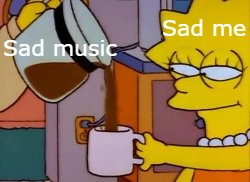

The emotional value of the music is connected with the melody, but also the lyrics.

The goal of this notebook is to explore how the topic of lyrics (like love, hope, ...) are connected to the emotional aspect of songs. This means that we are, for example, interested in what top 3 emotions are conveyed by popular songs that are in a specific category like 'love songs'. Are they highly euphoric or do they speak of heartache and sorrow? Are nostalgia songs characterized by sadness? What emotions are primarily associated with the 'Explore' topic?

Juslin, P. N. (2008). Emotional Responses to Music. Oxford Handbook of Music Psychology (1 ed.), unknown pages/chapter 12.

In [5]:
# Extract relevant features
topics_emotions = df_subset[['LDA_Topic','anger_norm2','anticipation_norm2','disgust_norm2','fear_norm2','joy_norm2','sadness_norm2','surprise_norm2','trust_norm2']]

## What are the Topics?
Let us fist explore again, the different topics we have.

In [6]:
print(topics_emotions['LDA_Topic'].unique())

['Desire' 'Hope' 'Thug' 'Explore' 'Nostalgia' 'Celebrate' 'Love' 'Fun']


Now, are the topics actually about? Let's have a look at their definitions according to Oxford Languages.

* **Desire**: a *strong* feeling of wanting to have something or wishing for something to happen.
* **Hope**: a feeling of expectation and desire for a particular thing to happen.  
* **Thug**: a violent person, especially a criminal.
* **Explore**: travel through (an unfamiliar area) in order to learn about it.
* **Nostalgia**: a sentimental longing or wistful affection for a period in the past.
* **Celebrate**: acknowledge (a significant or happy day or event) with a social gathering or enjoyable activity.
* **Love**: an intense feeling of deep affection./a great interest and pleasure in something.
* **Fun**: enjoyment, amusement, or light-hearted pleasure.

Some definitions can be intuitively assigned to positive emotions ('Celebrate','Fun'), while others sound negative ('Thug') or cannot be clearly defined as positive and negative ('Desire','Hope','Explore','Nostalgia'). At the same time, themes such as 'Love' initially seem like positive emotions, yet heartbreak songs, for example, are also a large subcategory.  

The songs in our data set were analyzed for eight emotions: joy, trust, anticipation, surprise, fear, sadness, disgust, anger. The values are stored in features [emotion]\_norm2, which describe the number of words related to [emotion] divided by the total number of words found by the dictionary. Let's get a quick overview over the emotion norms per topic in our subset.

## Overview over Current Data

In [7]:
mean = topics_emotions.groupby('LDA_Topic').mean()
mean

,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2
LDA_Topic,,,,,,,,
Celebrate,0.083506,0.188605,0.051700,0.094745,0.230982,0.087274,0.092965,0.170223
Desire,0.124844,0.141356,0.093725,0.129199,0.158713,0.126190,0.088225,0.137747
Explore,0.105676,0.149588,0.066951,0.150443,0.151279,0.146838,0.082357,0.146868
Fun,0.132530,0.152344,0.085994,0.123226,0.161481,0.099303,0.082919,0.162202
Hope,0.113449,0.152343,0.080589,0.123068,0.153579,0.143155,0.091708,0.142109
Love,0.091615,0.157166,0.068439,0.114563,0.203006,0.141056,0.082863,0.141291
Nostalgia,0.115731,0.146139,0.081369,0.118904,0.167584,0.108982,0.099256,0.162035
Thug,0.166763,0.124318,0.113702,0.144320,0.116058,0.115435,0.076670,0.142733


However, the properties of popular songs predominate here, since they can appear multiple times in our subset. Therefore, we must first remove duplicate songs from the dataset so we don't have biased results.

## Remove Duplicate Songs to Prevent Biased Data

In [8]:
print('Amount of entries (with duplicates): ', topics_emotions.shape[0])

Amount of entries (with duplicates):  69875


In [9]:
# Remove Duplicates
topics_emotions = df_subset[['Title','Artist','LDA_Topic','anger_norm2','anticipation_norm2','disgust_norm2','fear_norm2','joy_norm2','sadness_norm2','surprise_norm2','trust_norm2']]
topics_emotions.drop_duplicates(inplace=True)
# Drop Artist and Song Name
topics_emotions = topics_emotions[['LDA_Topic','anger_norm2','anticipation_norm2','disgust_norm2','fear_norm2','joy_norm2','sadness_norm2','surprise_norm2','trust_norm2']]
print('Amount of entries (without duplicates): ', topics_emotions.shape[0])

Amount of entries (without duplicates):  9474


Again, let's get an overview.

In [10]:
mean = topics_emotions.groupby('LDA_Topic').mean()
mean

,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2
LDA_Topic,,,,,,,,
Celebrate,0.074592,0.182788,0.050090,0.093450,0.247022,0.091461,0.091799,0.168799
Desire,0.119910,0.146764,0.084636,0.120570,0.168676,0.125525,0.095540,0.138379
Explore,0.101345,0.155397,0.064638,0.150072,0.151481,0.146354,0.082998,0.147715
Fun,0.141147,0.142095,0.094349,0.121225,0.151501,0.111404,0.084705,0.153574
Hope,0.107825,0.154103,0.077221,0.122611,0.162771,0.141930,0.089507,0.144033
Love,0.088550,0.162865,0.063441,0.112821,0.205636,0.136930,0.088288,0.141471
Nostalgia,0.116744,0.152419,0.071275,0.113236,0.175738,0.103846,0.104529,0.162214
Thug,0.163461,0.127648,0.109882,0.146445,0.115913,0.114187,0.076311,0.146154


## Explore Remaining Data: Anger

Next, let's pick one random emotion and see how frequent words related to that emotion appear in the different topics.

Text(0.5, 1.0, 'Anger Norm per Topic \n (Number of Words Related to Anger Divided by the Total Number of Words Found by the Dictionary)')

<Figure size 4200x2400 with 0 Axes>

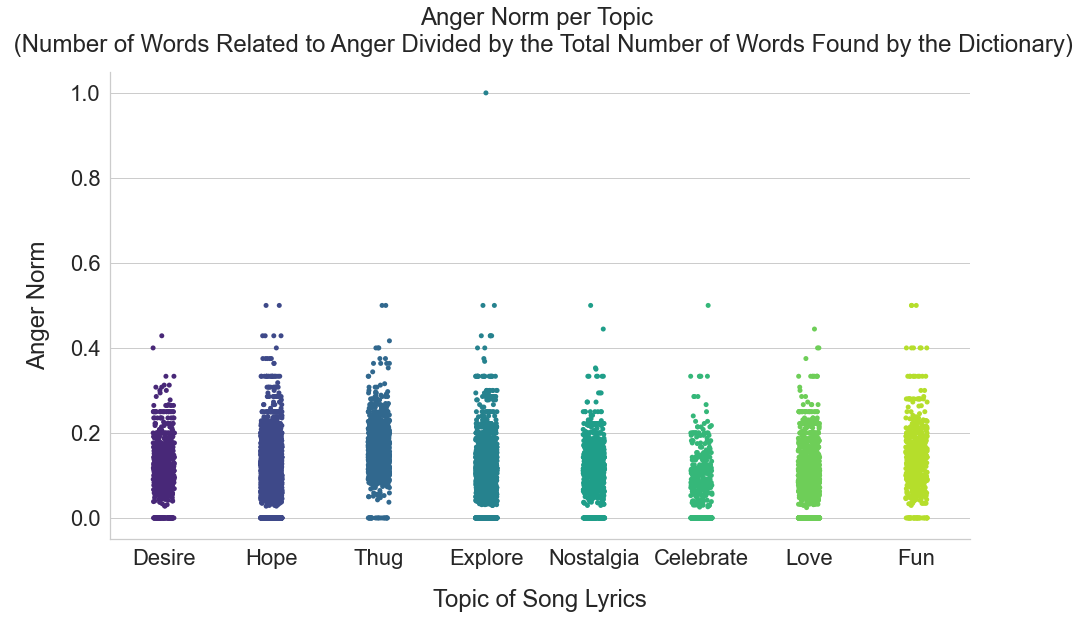

In [11]:
cols = ['anger_norm2','disgust_norm2','sadness_norm2','fear_norm2','surprise_norm2','anticipation_norm2','trust_norm2','joy_norm2']

sns.set(font_scale = 2)
sns.set_style("whitegrid")
plt.figure(figsize=(14,8), dpi = 300)
sns.catplot(data=topics_emotions, x='LDA_Topic',y='anger_norm2',palette='viridis', height=8, aspect=1.7)
plt.xlabel('Topic of Song Lyrics', labelpad=20)
plt.ylabel('Anger Norm', labelpad=20)

plt.title("Anger Norm per Topic \n (Number of Words Related to Anger Divided by the Total Number of Words Found by the Dictionary)", pad = 20)

We make two interesting observations:
* One song seems to consist only of anger words.
* There is a gap between songs where 0% of the words are related to anger and those where at least one word belongs to anger.

Before we take a look at the first issue, let's briefly discuss the second one. A reason for this might be the ratio between 1 (if there is only one word in a song related to anger) and the total number of words found in that song that are included in the dictionary.

In [12]:
anger_aux = topics_emotions[topics_emotions['anger_norm2']>0]
anger_aux[anger_aux['anger_norm2']==anger_aux['anger_norm2'].min()]

,LDA_Topic,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2
67822,Love,0.02439,0.219512,0.02439,0.04878,0.243902,0.097561,0.146341,0.195122


We can check if this is a song where only 1 word was associated with anger:

In [13]:
check = df_subset[df_subset['anger_norm2']==anger_aux['anger_norm2'].min()]
check = check[['Artist','Title','anger_norm2','anger']]
check.drop_duplicates(inplace=True)
check

,Artist,Title,anger_norm2,anger
67822,Dermot Kennedy,a closeness,0.02439,1.0


So it seems that the assumption is reasonable. (TODO check for all?)

How about the anger_norm2 == 1.0 candidate?

In [14]:
check = df_subset[df_subset['anger_norm2']==anger_aux['anger_norm2'].max()]
check = check[['Artist','Title','LDA_Topic','anger','anger_norm2','anticipation_norm2','disgust_norm2','fear_norm2','joy_norm2','sadness_norm2','surprise_norm2','trust_norm2','n_words']]
check.drop_duplicates(inplace=True)
check

,Artist,Title,LDA_Topic,anger,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,n_words
56810,The Lumineers,salt and the sea,Explore,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0


Apparently, the dictionary only found one word in the song and it is related to anger. However, the song definitely contains more words than that (as you can see here: https://www.songtexte.com/songtext/the-lumineers/salt-and-the-sea-g6b8212d2.html or https://open.spotify.com/track/6d2MCbByfqhU85Fmj8WCAN) and conveys a message about the difficulty of family bonds that is both desperate and hopeful at the same time. For this reason, even though it is only 1 in 10'000 songs, the song is dropped to not disturb the data.

In [15]:
topics_emotions = topics_emotions[topics_emotions['anger_norm2']<1.0]

Text(0.5, 1.0, 'Anger Norm per Topic \n (Number of Words Related to Anger Divided by the Total Number of Words Found by the Dictionary)')

<Figure size 4200x2400 with 0 Axes>

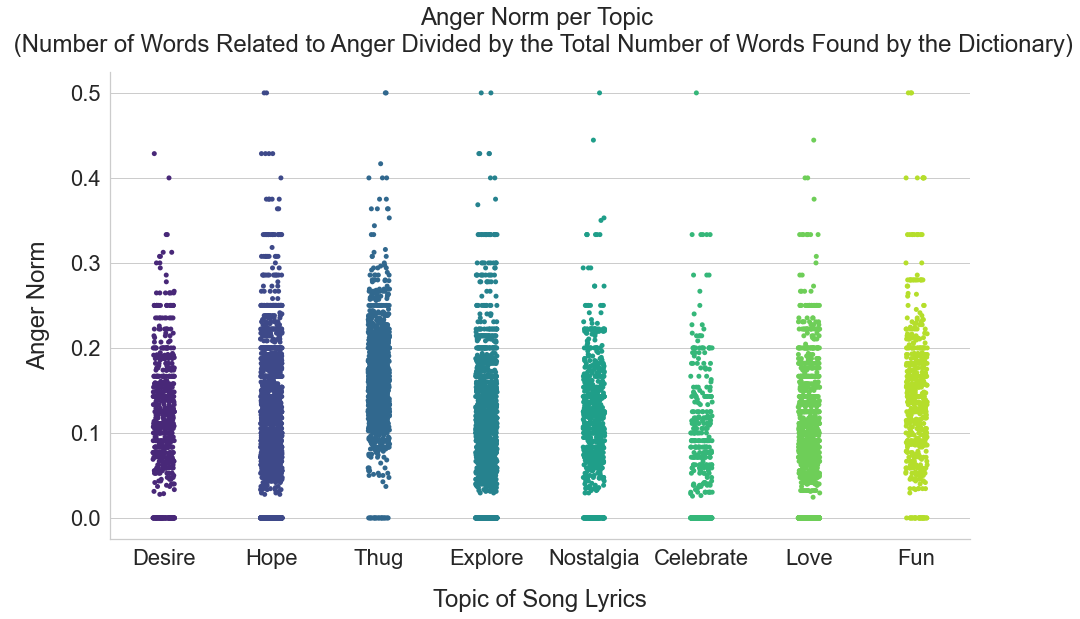

In [16]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
plt.figure(figsize=(14,8), dpi = 300)
sns.catplot(data=topics_emotions, x='LDA_Topic',y='anger_norm2',palette='viridis', height=8, aspect=1.7)
plt.xlabel('Topic of Song Lyrics', labelpad=20)
plt.ylabel('Anger Norm', labelpad=20)

plt.title("Anger Norm per Topic \n (Number of Words Related to Anger Divided by the Total Number of Words Found by the Dictionary)", pad = 20)

## Clean Data from All 1.0 Emotion-Norms where the Word Count is Less than 4

The other topics were treated accordingly as the loss of data was not too big.

In [17]:
aux = df_subset[(df_subset['joy_norm2']<1.0) | (df_subset['joy']>2.0)]
aux = aux[(df_subset['anticipation_norm2']<1.0) | (df_subset['anticipation']>2.0)]
aux = aux[(df_subset['disgust_norm2']<1.0) | (df_subset['disgust']>1.0)]
aux = aux[(df_subset['fear_norm2']<1.0) | (df_subset['fear']>1.0)]
aux = aux[(df_subset['sadness_norm2']<1.0) | (df_subset['sadness']>3.0)]
aux = aux[(df_subset['surprise_norm2']<1.0) | (df_subset['surprise']>1.0)]
aux = aux[(df_subset['trust_norm2']<1.0) | (df_subset['trust']>2.0)]
aux = aux[(df_subset['anger_norm2']<1.0) | (df_subset['anger']>1.0)]

# Remove Duplicates
aux = aux[['Title','Artist','LDA_Topic','anger_norm2','anticipation_norm2','disgust_norm2','fear_norm2','joy_norm2','sadness_norm2','surprise_norm2','trust_norm2']]
aux.drop_duplicates(inplace=True)
# Drop Artist and Song Name
aux = aux[['LDA_Topic','anger_norm2','anticipation_norm2','disgust_norm2','fear_norm2','joy_norm2','sadness_norm2','surprise_norm2','trust_norm2']]

print('Amount of entries after removing weird 1.0 norms: ', aux.shape[0], " instead of 9474")

Amount of entries after removing weird 1.0 norms:  9393  instead of 9474


Text(0.5, 1.0, 'Anger Norm per Topic \n (Number of Words Related to Anger Divided by the Total Number of Words Found by the Dictionary)')

<Figure size 4200x2400 with 0 Axes>

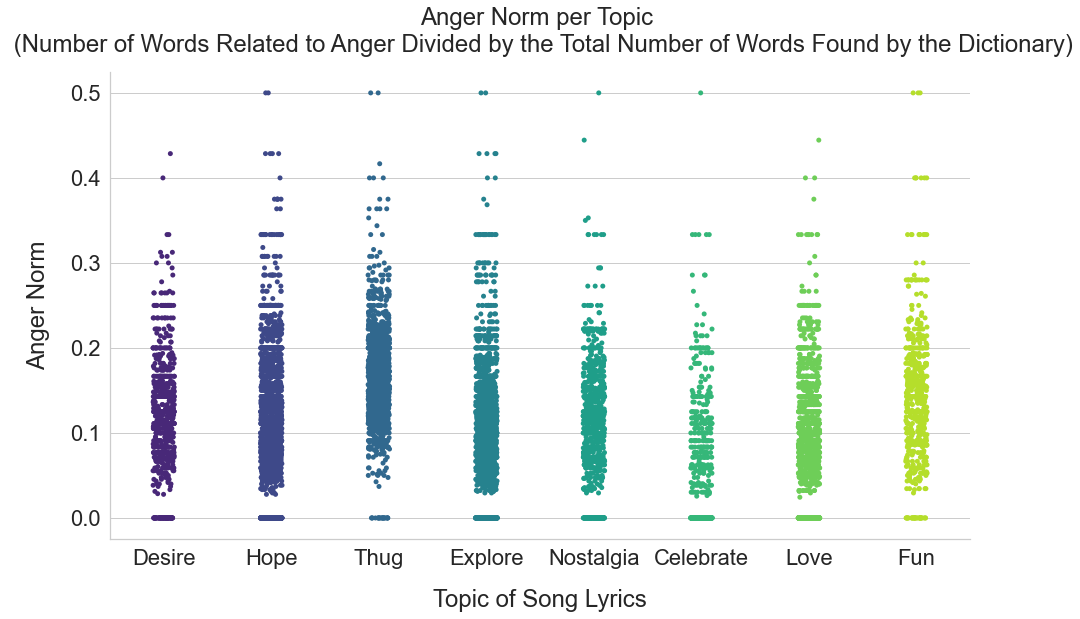

In [18]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
plt.figure(figsize=(14,8), dpi = 300)
sns.catplot(data=aux, x='LDA_Topic',y='anger_norm2',palette='viridis', height=8, aspect=1.7)
plt.xlabel('Topic of Song Lyrics', labelpad=20)
plt.ylabel('Anger Norm', labelpad=20)

plt.title("Anger Norm per Topic \n (Number of Words Related to Anger Divided by the Total Number of Words Found by the Dictionary)", pad = 20)

Maybe look at boxplots.

## Explore Topic-Emotion Relations

Finally, we can have a look at how the emotions are distributed among Topics and see if our assumptions regarding the tendencies were correct.

In [19]:
mean = aux.groupby('LDA_Topic').mean()
mean

,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2
LDA_Topic,,,,,,,,
Celebrate,0.076111,0.186510,0.051110,0.095353,0.231689,0.093323,0.093668,0.172236
Desire,0.121309,0.148475,0.085623,0.121976,0.166270,0.125531,0.092281,0.138535
Explore,0.101789,0.156366,0.065266,0.151529,0.147558,0.144539,0.083804,0.149149
Fun,0.141147,0.142095,0.094349,0.121225,0.151501,0.111404,0.084705,0.153574
Hope,0.108993,0.153515,0.077606,0.120327,0.161374,0.142565,0.090477,0.145143
Love,0.089692,0.163532,0.062110,0.114275,0.199691,0.137979,0.089426,0.143295
Nostalgia,0.117155,0.152956,0.071526,0.113634,0.174009,0.104211,0.104897,0.161612
Thug,0.163581,0.127742,0.109962,0.146552,0.115998,0.114270,0.076367,0.145529


For the following visual examination of the relationship between topics and emotions, the emotions are color-coded according to their positivity. The greener the visualization of an emotion, the more positive we believe it is.

In [20]:
topics_emotions_m = aux.melt('LDA_Topic', var_name='emotion', value_name='norm2')

Text(0.5, 1.0, 'Norms per Topic \n (Number of Words Related to [Emotion] Divided by the Total Number of Words Found by the Dictionary)')

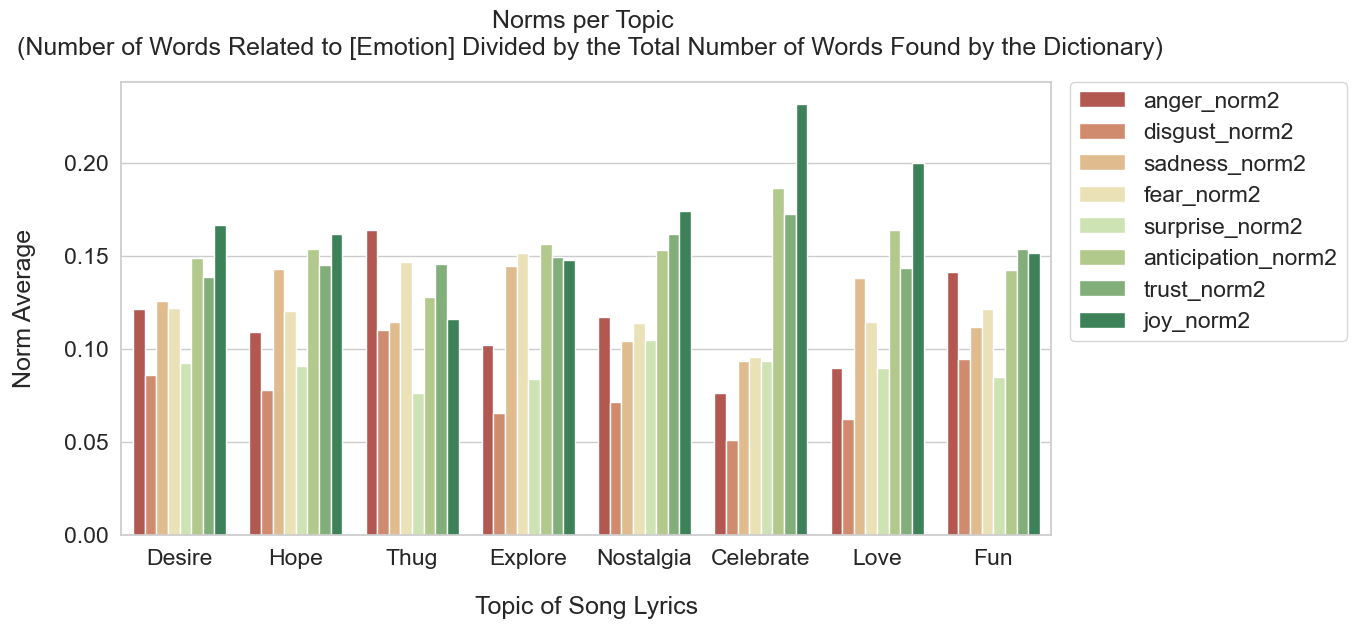

In [45]:
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
plt.figure(figsize=(12,6), dpi = 100)
palette = ['#c44940','#e0835e','#ecbd81','#f3e6ad','#cfebac','#b4d382','#7bb770','#318c55'] # #e2ebac
# palette = 'RdYlGn'
sns.barplot(data=topics_emotions_m,x='LDA_Topic',y='norm2',hue='emotion',palette=palette,hue_order=cols,ci=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Topic of Song Lyrics', labelpad=20)
plt.ylabel('Norm Average', labelpad=20)

plt.title("Norms per Topic \n (Number of Words Related to [Emotion] Divided by the Total Number of Words Found by the Dictionary)", pad = 20)

Text(0.5, 1.0, 'Norms per Topic \n (Number of Words Related to [Emotion] Divided by the Total Number of Words Found by the Dictionary)')

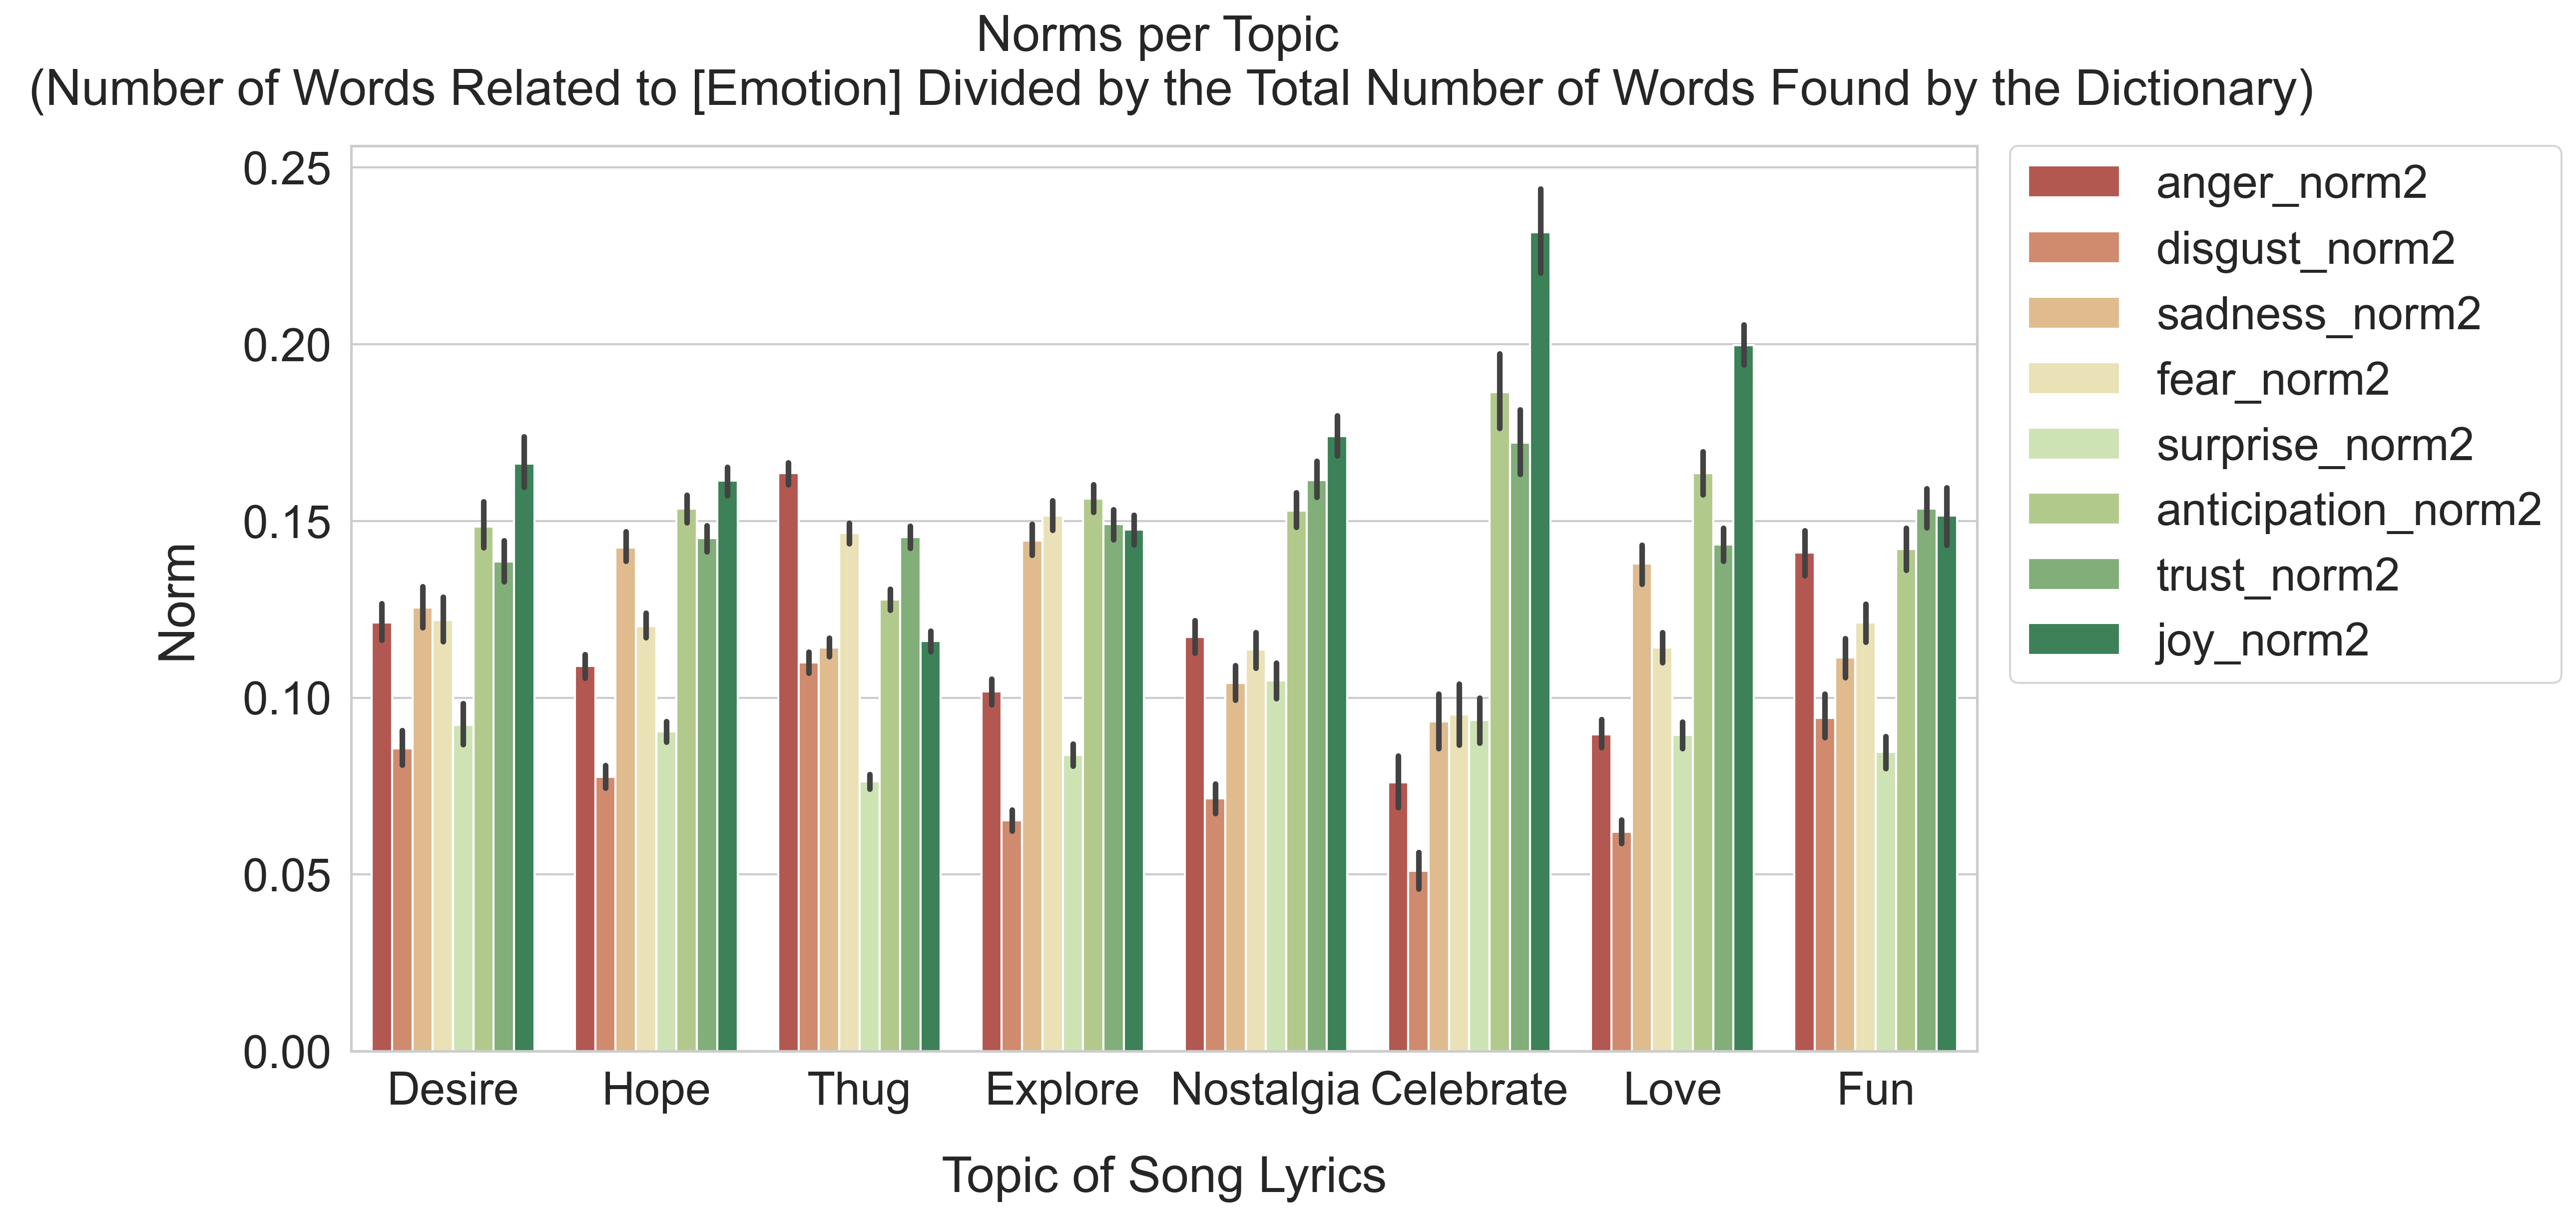

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,8), dpi = 300)
palette = ['#c44940','#e0835e','#ecbd81','#f3e6ad','#cfebac','#b4d382','#7bb770','#318c55'] # #e2ebac
# palette = 'RdYlGn'
sns.barplot(data=topics_emotions_m,x='LDA_Topic',y='norm2',hue='emotion',palette=palette,hue_order=cols)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Topic of Song Lyrics', labelpad=20)
plt.ylabel('Norm', labelpad=20)

plt.title("Norms per Topic \n (Number of Words Related to [Emotion] Divided by the Total Number of Words Found by the Dictionary)", pad = 20)

## Conclusion

Before we compare our results to our assumptions, let's take a quick look at our assumptions again:

* 'Celebrate' and 'Fun' are associated with positive emotions
* 'Desire', 'Hope', 'Explore', and 'Nostalgia' have no emptional preference
* 'Thug' relates to negative emotions
* 'Love' songs are both happy and tragic


In fact, 'Celebration' has the highest mean of joy-related words among all topics. In general, words associated with positive emotions predominate here. On average, every fourth to fifth recognized word can be assigned to the emotion 'Joy'. What is interesting here is that even though it is the most joyful among the topics, the topic is the second least represented in our dataset of popular songs. This observation is based on 70'485 songs and is by no means a generalization for all popular songs as we don't know if it represents the whole dataset of songs that were popular between 2017 and 2020. However, it could inspire other projects to explore what topics and emotions are shaping our time.

For 'Fun' as well, the most represented emotions on average are 'Anticipation', 'Trust' and 'Joy'. However, these do not stand out as clearly as in 'Celebrate'. Additionally, 'Anger' plays an unexpectedly large role in this topic.

'Desire', 'Hope', 'Explore', and 'Nostalgia' have quite similar results. For all of them, joy is one of the most occuring emotion. Only for 'Explore' it was surpassed by 'Anticipation', 'Fear', and 'Trust' by barely any difference. All four topics have tendencies but not as clear as for 'Celebrate'. Thus, we should keep in mind that - if we compare emotions for each of these four topics individually - we are talking about a difference of max. 0.1/10% between the norms. With that in our mindsm let's take a closer look at all four topics:
* **Desire**: Instead of saying what it is, it is easier to say what it is not. It seems to be least related to surprise and disgust. Unlike with anticipation and joy for example, it is difficult to associate 'Desire' with those two terms. You might be disappointed and sad if you cannot achieve what you desire but disgust is a strong emotional response to that.
* **Hope**: As hope is quite similar to desire in terms of meaning, it is reasonable that the results are similar as well.
* **Explore**: 'Anticipation', 'Fear', 'Trust', 'Joy' und 'Sadness' stand out the most here. This seems reasonable. While exploring, you face unfamiliarity in order to learn something new. This can be motivating and exciting, but it can also be intimidating and setbacks in exploration can lead to disappointment. Unexpectedly, however, suprise is quite low on the list. 
* **Nostalgia**: This is the category that is the most different from the other three discussed before in terms of distance in values. According to our data, this topic tends to be cheerful. It has a surprisingly low sadness percentage compared to other emotions. Nostalgia seems to be preferably addressed in a positive way rather than a depressing one.

Thug has relatively few surprises (pun not intended but welcome). It is mostly associated with anger, although anger does not predominate this topic as much as joy did with 'Celebration'. However, it is not as heavily negative emotions biased as expected. An interesting observation to mention (yet not surprising as well for 'gangster music') is that 'Thug' has the highest disgust value among all topics.

While we were not sure whether 'Love' contains more romantic or heartbreaking songs in the beginning, it seems that at least in our dataset of popular songs this topic tends towards positive emotions. There is, however, a non-negligible amount of sadness and fear in this topic.

Note: These results primarily apply to popular songs, their topics, and their emotional message.

## Meaning for Further Exploration

There are a lot of interesting directions in which this exploration can continue:
* What are the preferred topics of different countries/globally and what does it tell us about them?
* How similar are different topics actually?
* What are the main topics of some artists based on our dataset and what does it tell us about them?
* How are topics distributed among genres?
* Based on genres and their predominant topics, can we guess the approximate distribution of emotions in the genre?
* ...

# Topics and Countries
Let's see if we can get some results for the first question above.

In [23]:
# Just a fresh start from the original subset
df_subset = pd.read_csv('./dataset_/subset_dataset_with_emotion_norms.csv') 

In [24]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69875 entries, 0 to 69874
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              69875 non-null  object 
 1   Uri                  69875 non-null  object 
 2   Popularity           69875 non-null  float64
 3   Title                69875 non-null  object 
 4   Artist               69875 non-null  object 
 5   Album/Single         69875 non-null  object 
 6   sub_genre            69875 non-null  object 
 7   Artist_followers     69875 non-null  float64
 8   Explicit             69875 non-null  bool   
 9   Album                69875 non-null  object 
 10  Release_date         69875 non-null  object 
 11  Track_number         69875 non-null  int64  
 12  Tracks_in_album      69875 non-null  int64  
 13  danceability         69875 non-null  float64
 14  energy               69875 non-null  float64
 15  key                  69875 non-null 

In [25]:
df_subset = df_subset[['Country','Popularity','LDA_Topic']]
df_subset.head()

,Country,Popularity,LDA_Topic
0,Global,418.0,Desire
1,USA,581.2,Desire
2,UK,120.8,Desire
3,Austria,404.0,Desire
4,Australia,29.6,Desire


## Global

Assumption: Primarily positive, motivating songs and love songs. (Based on artist popularity explorations from last week) (careful! this is just a subset)

THE POPULARITIES SHOULD ONLY BE SEEN IN COMPARISON WITHIN THE SAME COUNTRY.

In [26]:
df_global = df_subset[df_subset['Country'] == 'Global']

In [27]:
df_global.head()

,Country,Popularity,LDA_Topic
0,Global,418.00,Desire
23,Global,244.95,Hope
49,Global,88.40,Hope
54,Global,7959.50,Desire
79,Global,6575.75,Hope


Text(0.5, 1.0, 'Number of Popular Songs (Global) Related to Topics')

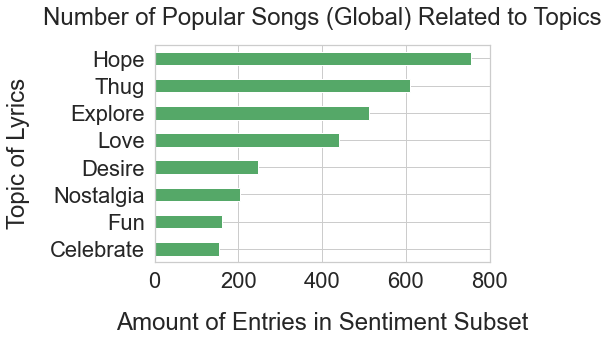

In [28]:
df_global['LDA_Topic'].value_counts().sort_values(ascending=True).plot(kind='barh',color='g')
plt.xlim([0, 800])
plt.xlabel('Amount of Entries in Sentiment Subset', labelpad=20)
plt.ylabel('Topic of Lyrics', labelpad=20)

plt.title("Number of Popular Songs (Global) Related to Topics", pad = 20)

In [29]:
# based on popularity; relative popularity in global!
# df_global['Relative_Popularity'] = (df_global['Popularity']-df_global['Popularity'].min())/(df_global['Popularity'].max()-df_global['Popularity'].min())
df_global['Relative_Popularity'] = df_global['Popularity']/df_global['Popularity'].max()
global_ = df_global[['LDA_Topic','Relative_Popularity']].groupby('LDA_Topic').sum()
global_ = global_.sort_values(by=['Relative_Popularity'],ascending=False)
global_['Relative_Popularity'] = global_['Relative_Popularity'] / global_['Relative_Popularity'].max()
global_

,Relative_Popularity
LDA_Topic,
Hope,1.000000
Thug,0.681908
Love,0.536831
Desire,0.392152
Explore,0.391727
Celebrate,0.278836
Nostalgia,0.194315
Fun,0.158263


In [30]:
# TODO result / conclusion

## Germany

Assumption: Thug as number one (based on artist popularity observations from last week, where rap predominated) (careful, this is just a subset!)

THE POPULARITIES SHOULD ONLY BE SEEN IN COMPARISON WITHIN THE SAME COUNTRY.

In [31]:
df_germany = df_subset[df_subset['Country'] == 'Germany']
palette = ['#c44940','#e0835e','#ecbd81','#f3e6ad','#cfebac','#b4d382','#7bb770','#318c55']

Text(0.5, 1.0, 'Number of Popular Songs (Germany) Related to Topics')

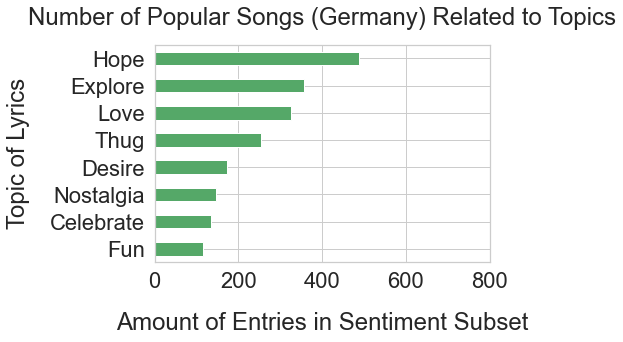

In [32]:
df_germany['LDA_Topic'].value_counts().sort_values(ascending=True).plot(kind='barh',color='g')
plt.xlim([0, 800])
plt.xlabel('Amount of Entries in Sentiment Subset', labelpad=20)
plt.ylabel('Topic of Lyrics', labelpad=20)

plt.title("Number of Popular Songs (Germany) Related to Topics", pad = 20)

In [33]:
# based on popularity; popularity within germany -> most popular = 1;
# df_germany['Relative_Popularity'] = (df_germany['Popularity']-df_germany['Popularity'].min())/(df_germany['Popularity'].max()-df_germany['Popularity'].min())
df_germany['Relative_Popularity'] = df_germany['Popularity']/df_germany['Popularity'].max()
germany = df_germany[['LDA_Topic','Relative_Popularity']].groupby('LDA_Topic').sum()
germany = germany.sort_values(by=['Relative_Popularity'],ascending=False)
# germany = germany.reset_index(level=0)
germany['Relative_Popularity'] = germany['Relative_Popularity'] / germany['Relative_Popularity'].max()
# germany['Relative_Popularity'] = (germany['Relative_Popularity']-germany['Relative_Popularity'].min())/(germany['Relative_Popularity'].max()-germany['Relative_Popularity'].min())
germany

,Relative_Popularity
LDA_Topic,
Hope,1.000000
Love,0.726860
Explore,0.551125
Thug,0.476911
Desire,0.436148
Celebrate,0.387579
Nostalgia,0.220418
Fun,0.199564


In [34]:
# TODO result conclusion -> What category/topic are those german rappers in?

In [35]:
df_subset = pd.read_csv('./dataset_/subset_dataset_with_emotion_norms.csv') 
df_subset[df_subset['Artist'] == 'Apache 207'][['Artist','Title','LDA_Topic']].drop_duplicates()

,Artist,Title,LDA_Topic
22385,Apache 207,matrix,Explore
66373,Apache 207,famous,Thug


## Conclusion
We do not have a good basis as subset to explore the relationship between country and song topic